In [1]:
!pip install catboost
!pip install lightgbm

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

file1_path = "/content/drive/MyDrive/minor-2/users.csv"
file2_path = "/content/drive/MyDrive/minor-2/fusers.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)



In [9]:
valid_columns = df1.columns[df1.isnull().mean() < 0.5]
df_cleaned = df1[valid_columns]

numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_numeric = df_cleaned[numerical_columns]

imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(df_numeric)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df1["cluster"] = kmeans.fit_predict(df_pca)


X = df_pca
y = df1["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(C=1.0, kernel="rbf"),
    "CatBoost":CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    "LightGBM":LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
}

accuracy_results = {}
recall_results = {}
precision_results = {}
f1_results = {}
conf_matrices = {}
classification_reports = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)
    recall_results[name] = recall_score(y_test, y_pred, average="weighted")
    precision_results[name] = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    f1_results[name] = f1_score(y_test, y_pred, average="weighted")
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred)


model_compare = pd.DataFrame({
    "Model": list(recall_results.keys()),
    "Recall Score": list(recall_results.values())
})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2779, number of used features: 8
[LightGBM] [Info] Start training from score -6.831234
[LightGBM] [Info] Start training from score -0.563401
[LightGBM] [Info] Start training from score -1.397512
[LightGBM] [Info] Start training from score -1.979204
[LightGBM] [Info] Start training from score -3.117662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


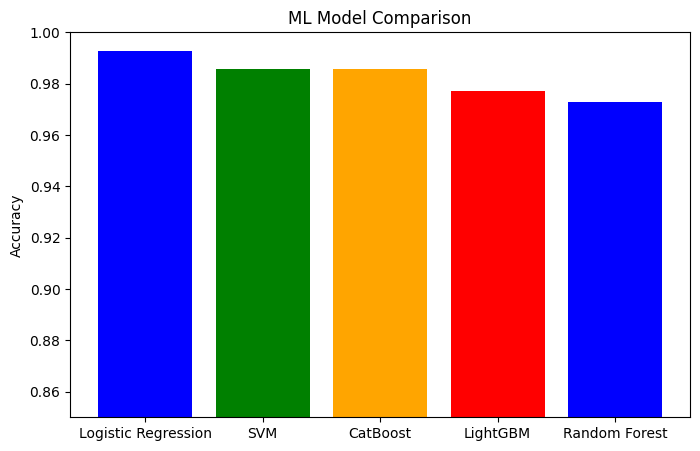

In [11]:
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=["blue", "green", "orange", "red"])
plt.ylabel("Accuracy")
plt.title("ML Model Comparison")
plt.ylim(0.85, 1.0)
plt.show()

<ipython-input-6-3bd5708509b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_compare, x="Model", y="Recall Score", palette='hot', edgecolor=sns.color_palette('OrRd',9))


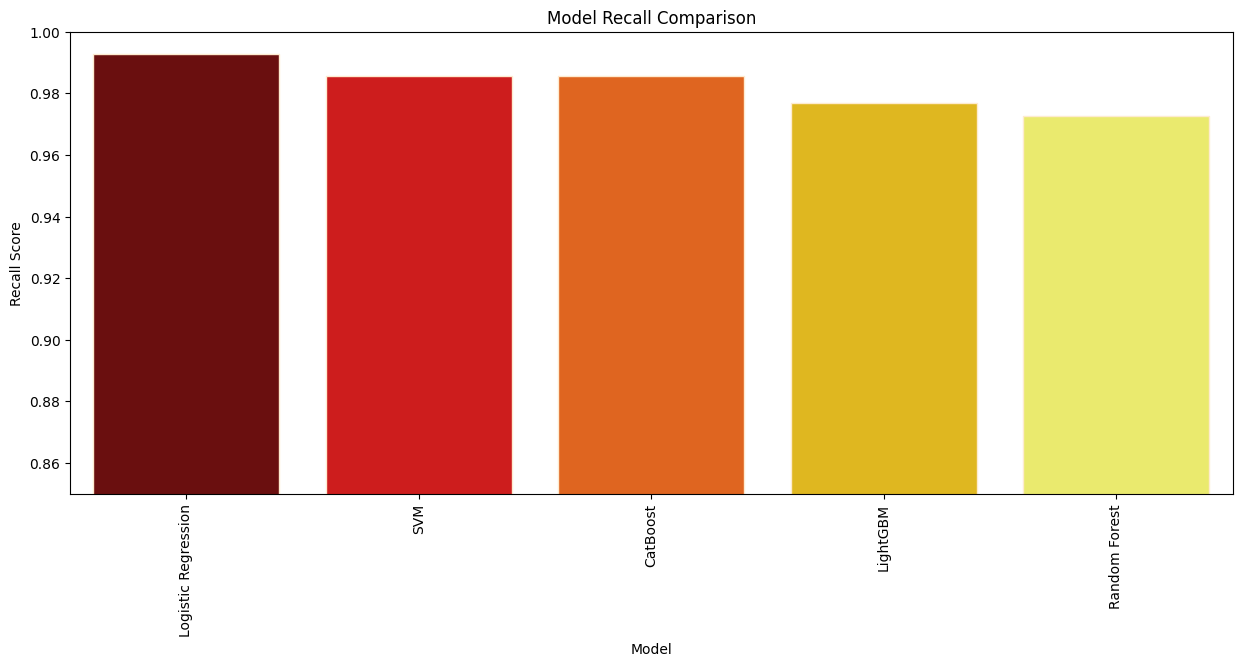

In [6]:
plt.subplots(figsize=(15,6))
sns.barplot(data=model_compare, x="Model", y="Recall Score", palette='hot', edgecolor=sns.color_palette('OrRd',9))
plt.xticks(rotation=90)
plt.ylim([0.85,1])
plt.title('Model Recall Comparison')
plt.show()

In [7]:
print("Model Performance Metrics:")
for model in models.keys():
    print(f"\n{model}:")
    print(f"Accuracy: {accuracy_results[model]:.4f}")
    print(f"Recall: {recall_results[model]:.4f}")
    print(f"Precision: {precision_results[model]:.4f}")
    print(f"F1 Score: {f1_results[model]:.4f}")
    print("Confusion Matrix:")
    print(conf_matrices[model])
    print("Classification Report:")
    print(classification_reports[model])

Model Performance Metrics:

Logistic Regression:
Accuracy: 0.9928
Recall: 0.9928
Precision: 0.9929
F1 Score: 0.9926
Confusion Matrix:
[[395   0   0   0]
 [  1 172   0   0]
 [  0   0  95   0]
 [  3   1   0  28]]
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       395
           2       0.99      0.99      0.99       173
           3       1.00      1.00      1.00        95
           4       1.00      0.88      0.93        32

    accuracy                           0.99       695
   macro avg       1.00      0.97      0.98       695
weighted avg       0.99      0.99      0.99       695


SVM:
Accuracy: 0.9856
Recall: 0.9856
Precision: 0.9855
F1 Score: 0.9854
Confusion Matrix:
[[392   2   0   1]
 [  2 171   0   0]
 [  0   0  95   0]
 [  4   1   0  27]]
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       395
           2       0.98      0.

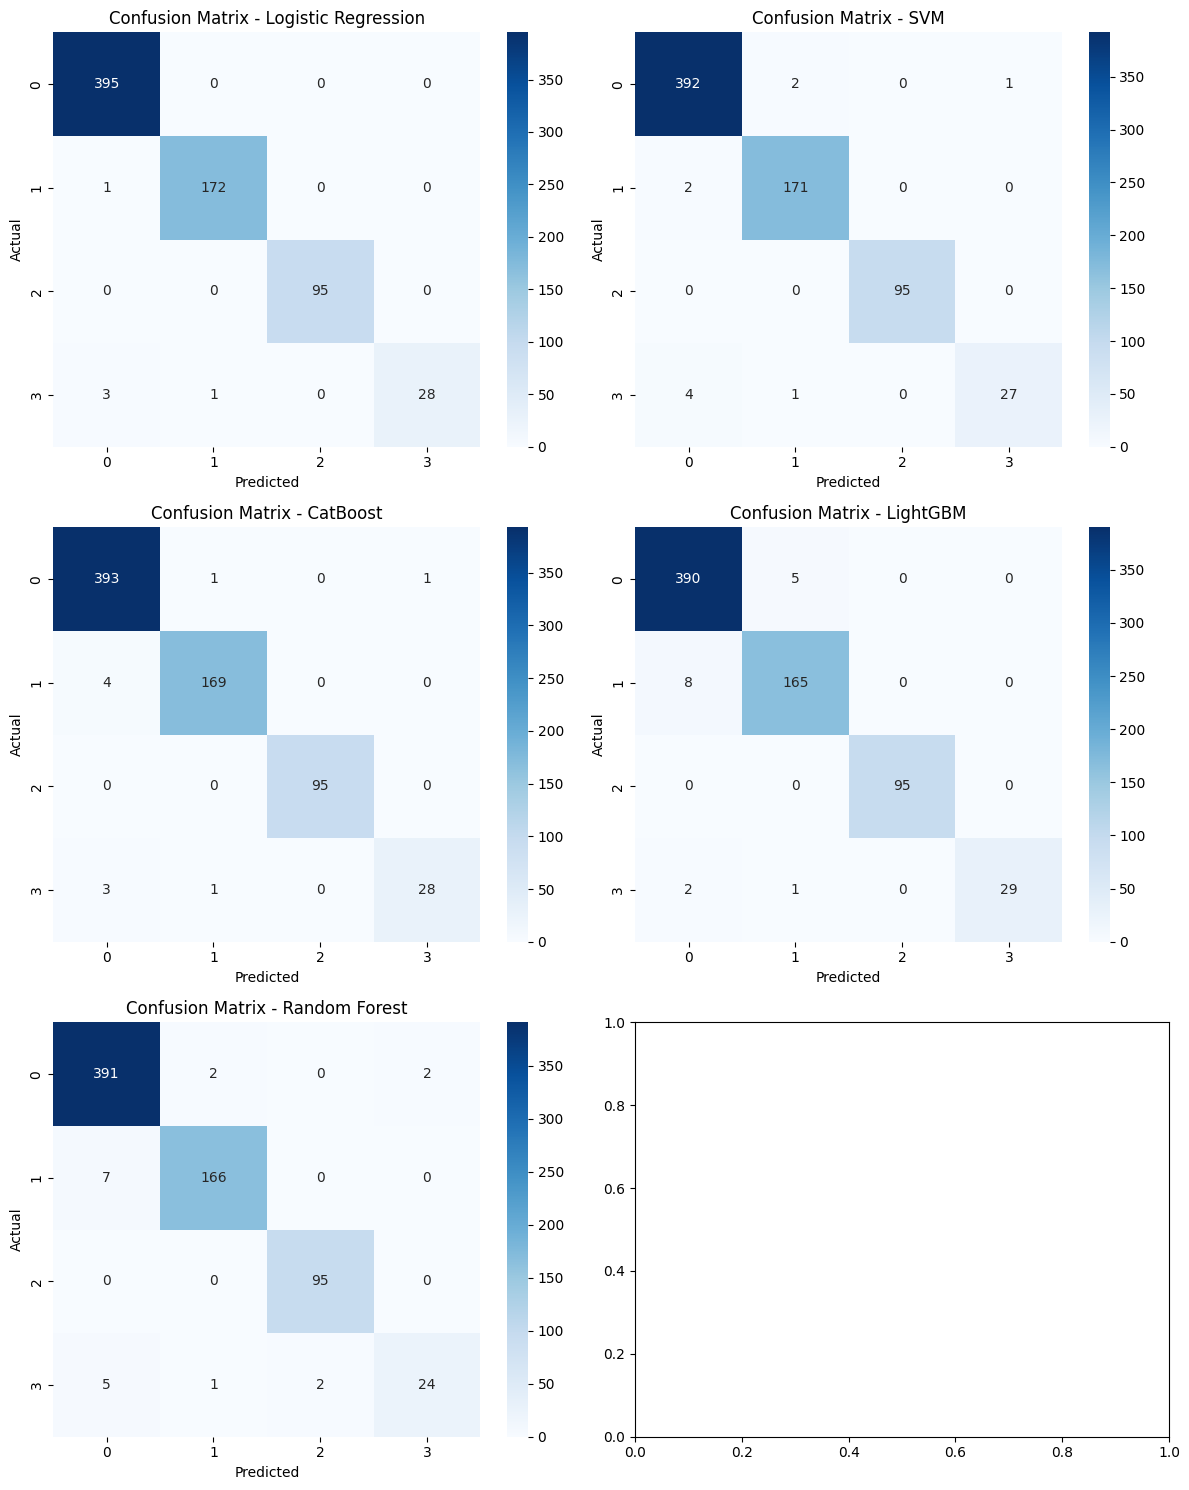

In [ ]:
num_models = len(conf_matrices)
rows = (num_models // 2) + (num_models % 2)
cols = 2 if num_models > 1 else 1
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = np.array(axes).flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()